# Test on a dataset

## Initialization

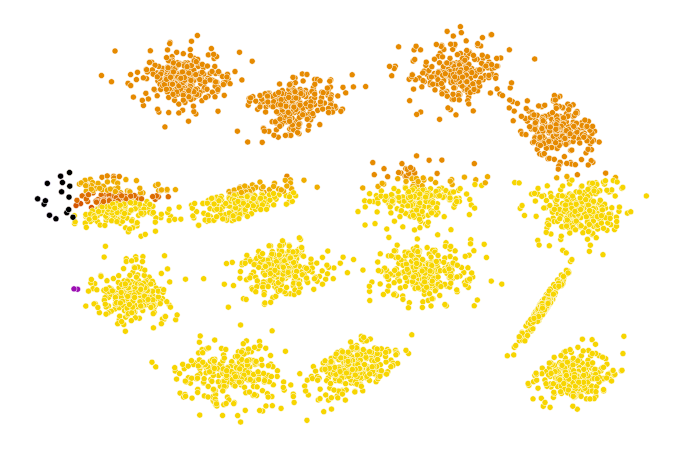

## Algorithms

### KM

clustering_iterations=100
0... 1... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 

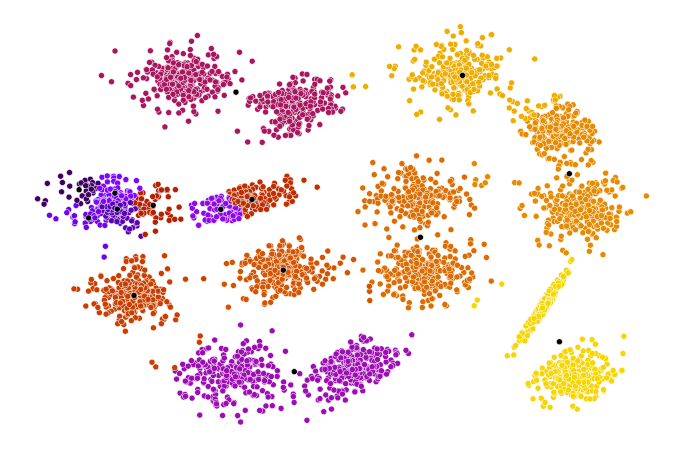

variance: 0.008082804733688885


### RS (1KM)

clustering_iterations=100
0... 1... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 

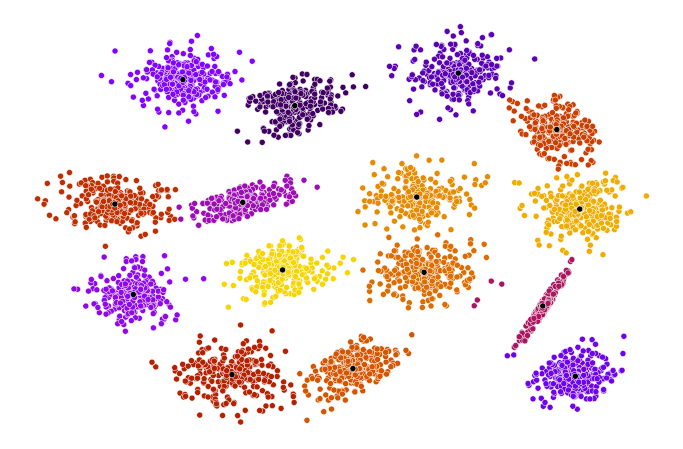

variance: 0.0020574104107330972


### RS (2KM)

clustering_iterations=50
0... 1... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 

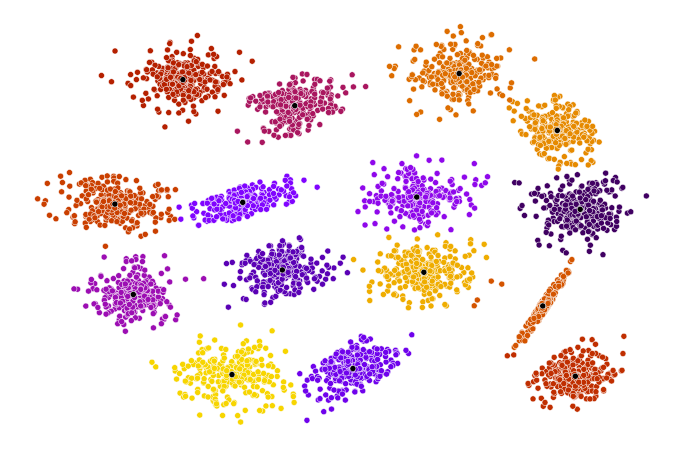

variance: 0.0020577806675278216


### KM/RS

clustering_iterations=100
0... 1... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 

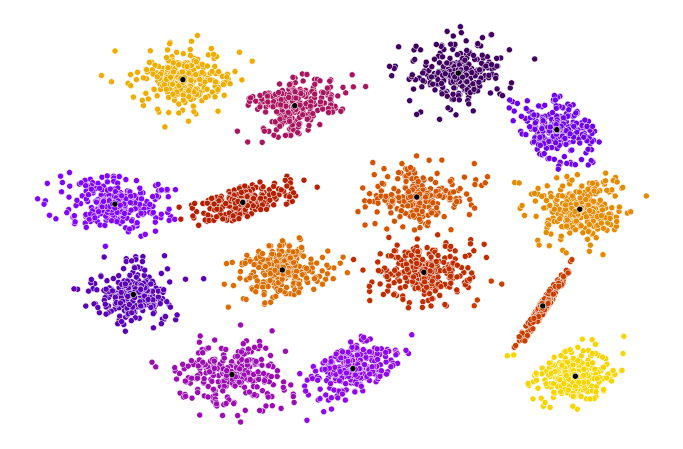

variance: 0.002057410733501107


### KHM

clustering_iterations=100
0... 1... 2... 3... 4... 5... 6... 7... 8... 9... 10... 11... 12... 13... 14... 15... 16... 17... 18... 19... 20... 21... 22... 23... 24... 25... 26... 27... 28... 29... 30... 31... 32... 33... 34... 35... 36... 37... 38... 39... 40... 41... 42... 43... 44... 45... 46... 47... 48... 49... 50... 51... 52... 53... 54... 55... 56... 57... 58... 59... 60... 61... 62... 63... 64... 65... 66... 67... 68... 69... 70... 71... 72... 73... 74... 75... 76... 77... 78... 79... 80... 81... 82... 83... 84... 85... 86... 87... 88... 89... 90... 91... 92... 93... 94... 95... 96... 97... 98... 99... 

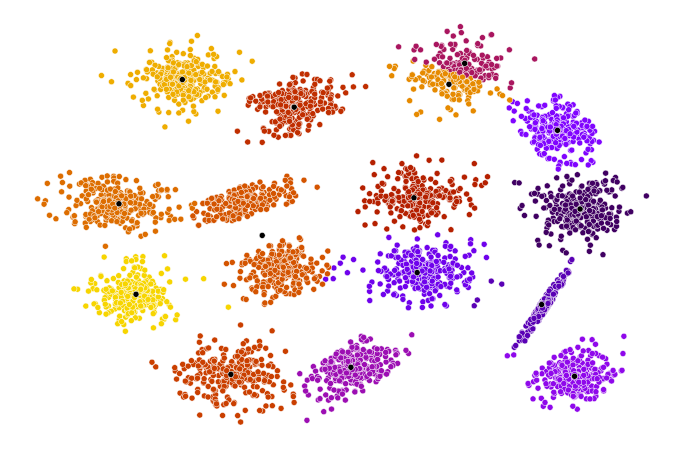

variance: 0.00315357430312231


## Convergence

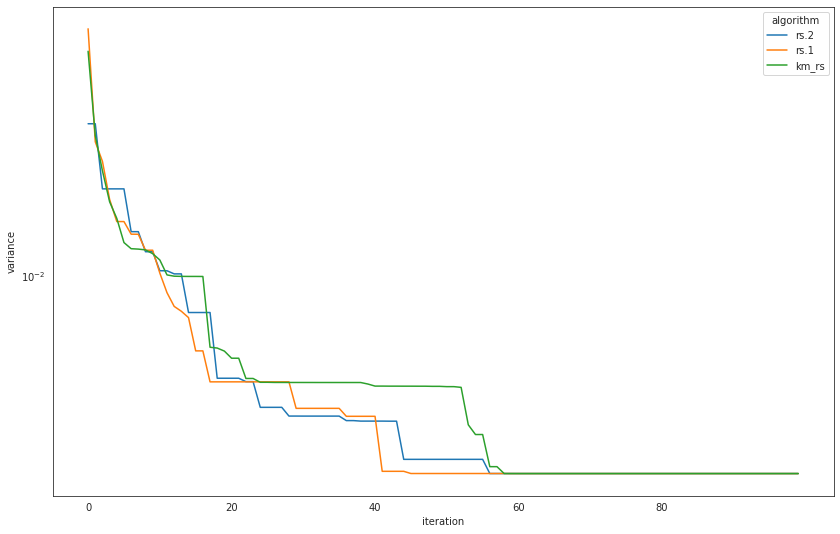

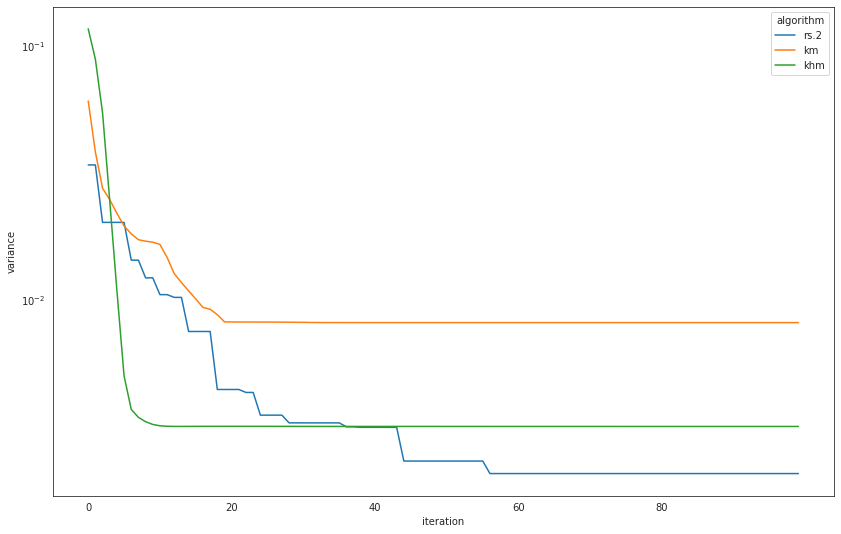


## Conclusion

Alternating KHM/KM is almost as good as KHM, but not quite.

Alternating created 1 misplaced mean (KHM had no misplaced means)
and slightly increased variance, but not nearly as bad as KM alone.

A single KM iteration is enough to eliminate the initial variance spike of KHM
(in this example KHM variance was always lower than KM).
But for the continuous clustering of a video stream there is no "first iteration"
so the next best thing is to alternate KM/KHM.



In [10]:
import random

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
from IPython.display import HTML, Markdown, display

display(Markdown("# Test on a dataset"))


def verify_alternating():
    NUM_CLUSTERS = 15
    NUM_ITERATIONS = 100

    # with open("Datasets/Birch/Birch1.txt") as file:
    with open("Datasets/S/S1.txt", encoding="utf-8") as file:
        points = [
            filter(
                lambda x: x != "",
                line.split(" ")
            )
            for line in file.readlines()
        ]
        points = [
            tuple([int(coord.replace("/n", "")) for coord in point])
            for point in points
        ]

        _ = """
        points = [
            points[random_index]
            for random_index in np.random.choice(
                len(points), 10000, replace=False
            )
        ]
        """

        def normalize_points(points):
            transposed_points = list(zip(*points))

            min_coords = [
                min(coord_list)
                for coord_list in transposed_points
            ]

            max_coords = [
                max(coord_list)
                for coord_list in transposed_points
            ]

            coords_range = [
                max_coord - min_coord
                for max_coord, min_coord in zip(max_coords, min_coords)
            ]

            def normalize_point(point):
                return [
                    (coord - min_coord) / range_coord
                    for coord, min_coord, range_coord in zip(point, min_coords, coords_range)
                ]

            return [
                normalize_point(point)
                for point in points
            ]

        points = normalize_points(points)

    def init_means(points):
        return sorted(
            points,
            key=lambda point: point[0]
        )[0:NUM_CLUSTERS]

    def distance(point_1, point_2):
        dist = sum(
            [
                (point_1[i] - point_2[i]) ** 2
                for i in range(len(point_1))
            ]
        )

        return dist ** 0.5

    def get_attribution(means):
        attribution = [0] * len(points)

        def point_mean_index(point):
            distances = [
                distance(
                    point,
                    means[mean_index]
                )
                for mean_index in range(len(means))
            ]

            for mean_index in range(len(distances)):
                if distances[mean_index] == min(distances):
                    return mean_index

        return [
            point_mean_index(point)
            for point in points
        ]

        plt.show()

    def km_weights(means):
        attribution = get_attribution(means)

        return [
            [
                1
                if attribution[point_index] == mean_index
                else
                0
                for mean_index in range(len(means))
            ]
            for point_index in range(len(points))
        ]

    def khm_weights(means):
        P = 3

        def point_weights(point):
            distances = [
                distance(point, mean)
                for mean in means
            ]

            min_distance = min(distances)

            def mean_weight(mean_index):

                top = min_distance ** (P - 2)
                if distances[mean_index] != min_distance:
                    top = top * (min_distance /
                                 distances[mean_index]) ** (P + 2)

                bot = sum(
                    [
                        (
                            (min_distance / distances[other_mean_index]) ** P
                            if distances[other_mean_index] != min_distance
                            else
                            1
                        )
                        for other_mean_index in range(len(means))
                    ]
                )

                return top / (bot * bot)

            return [
                mean_weight(mean_index)
                for mean_index in range(len(means))
            ]

        return [
            point_weights(point)
            for point in points
        ]

    def update_means(means, weighting_function):

        weights = weighting_function(means)
        cluster_point_weights = [
            (
                point_weights,
                sum(point_weights)
            )
            for point_weights in list(zip(*weights))
        ]

        return [
            [
                (
                    sum(
                        [
                            coord_val * weight
                            for coord_val, weight in zip(coord_vals, point_weights)
                        ]
                    ) / sum_point_weights
                    if sum_point_weights > 0
                    else
                    mean
                )
                for coord_vals in list(zip(*points))
            ]
            for mean, (point_weights, sum_point_weights) in zip(means, cluster_point_weights)
        ]

    def measure_variance(means):
        def point_variance(point):
            distances = [
                distance(point, mean)
                for mean in means
            ]

            min_distance = min(distances)

            return min_distance * min_distance

        point_variances = [
            point_variance(point)
            for point in points
        ]

        return sum(point_variances) / len(point_variances)

    def print_progress(i):
        print(f"{i}... ", end="")

    def show_means(means):
        plt.figure(figsize=(12, 8))

        g = sb.scatterplot(
            x=list(zip(*points))[0],
            y=list(zip(*points))[1],
            hue=get_attribution(means),
            palette=sb.color_palette(
                "gnuplot",
                len(
                    set(
                        get_attribution(means)
                    )
                )
            ),
        )

        g.set(xticklabels=[])
        g.set(yticklabels=[])

        g = sb.scatterplot(
            x=list(zip(*means))[0],
            y=list(zip(*means))[1],
            hue=[-1 for i in range(len(list(zip(*means))[0]))],
            palette=["black"]
        )

        g.legend().remove()
        g.set(xlabel=None)

        sb.despine(left=True, bottom=True)

        plt.show()

    sb.set_style("white")

    def run_clustering(algorithm):
        means = init_means(points)
        variances = []
        clustering_iterations = NUM_ITERATIONS
        match algorithm.split("."):
            case ["rs", km_iterations]:
                km_iterations = int(km_iterations)
                clustering_iterations = NUM_ITERATIONS // km_iterations
                print(f"{clustering_iterations=}")
                for i in range(clustering_iterations):
                    cur_variance = measure_variance(means)
                    new_means = means.copy()
                    new_means[random.randrange(len(means))] = random.choice(points)
                    for k in range(km_iterations):
                        new_means = update_means(new_means, km_weights)
                    new_variance = measure_variance(new_means)
                    means = new_means if new_variance < cur_variance else means
                    print_progress(i)
                    for k in range(km_iterations):
                        variances.append(min(cur_variance, new_variance))
            case ["km_rs"]:
                clustering_iterations = NUM_ITERATIONS
                km_iterations = 1
                print(f"{clustering_iterations=}")
                for i in range(clustering_iterations):
                    if i % 2 == 0:
                        weighting_function = km_weights
                        means = update_means(means, weighting_function)
                        print_progress(i)
                        variances.append(measure_variance(means))
                    else:
                        cur_variance = measure_variance(means)
                        new_means = means.copy()
                        new_means[random.randrange(len(means))] = random.choice(points)
                        for k in range(km_iterations):
                            new_means = update_means(new_means, km_weights)
                        new_variance = measure_variance(new_means)
                        means = new_means if new_variance < cur_variance else means
                        print_progress(i)
                        for k in range(km_iterations):
                            variances.append(min(cur_variance, new_variance))
            case ["km"]:
                clustering_iterations = NUM_ITERATIONS
                print(f"{clustering_iterations=}")
                for i in range(clustering_iterations):
                    weighting_function = km_weights
                    means = update_means(means, weighting_function)
                    print_progress(i)
                    variances.append(measure_variance(means))
            case ["khm"]:
                clustering_iterations = NUM_ITERATIONS
                print(f"{clustering_iterations=}")
                for i in range(clustering_iterations):
                    weighting_function = khm_weights
                    means = update_means(means, weighting_function)
                    print_progress(i)
                    variances.append(measure_variance(means))
            case _ :
                raise Exception("invalid algorithm")
            
        show_means(means)
        print(f"variance: {measure_variance(means)}")

        return pd.DataFrame(
            [
                (
                    iteration,
                    variance,
                    algorithm
                )
                for iteration, variance in enumerate(variances)
            ],
            columns=["iteration", "variance", "algorithm"]
        )

    display(Markdown("## Initialization"))
    show_means(init_means(points))

    display(Markdown("## Algorithms"))

    display(Markdown("### KM"))
    variances_km = run_clustering("km")

    display(Markdown("### RS (1KM)"))
    variances_rs1 = run_clustering("rs.1")

    display(Markdown("### RS (2KM)"))
    variances_rs2 = run_clustering("rs.2")

    display(Markdown("### KM/RS"))
    variances_km_rs = run_clustering("km_rs")

    display(Markdown("### KHM"))
    variances_khm = run_clustering("khm")

    display(Markdown("## Convergence"))

    def plot_convergence(variance_logs):
        variances = pd.concat(variance_logs).reset_index()

        plt.figure(figsize=(14, 9))

        g = sb.lineplot(
            data=variances,
            x="iteration",
            y="variance",
            hue="algorithm",
            ci=None,
            # marker="o",
        )

        g.set(yscale="log")

        plt.xticks([x*NUM_ITERATIONS//5 for x in range(5)])
        plt.show()

    plot_convergence(
        [
            variances_rs2,
            variances_rs1,
            variances_km_rs,
        ]
    )

    plot_convergence(
        [
            variances_rs2,
            variances_km,
            variances_khm,
        ]
    )


# %snakeviz verify_alternating()
verify_alternating()

display(
    Markdown(
        """
## Conclusion

Alternating KHM/KM is almost as good as KHM, but not quite.

Alternating created 1 misplaced mean (KHM had no misplaced means)
and slightly increased variance, but not nearly as bad as KM alone.

A single KM iteration is enough to eliminate the initial variance spike of KHM
(in this example KHM variance was always lower than KM).
But for the continuous clustering of a video stream there is no "first iteration"
so the next best thing is to alternate KM/KHM.

"""
    )
)
